In [3]:
import numpy as np
from pylab import * 
import matplotlib.pyplot as plt

In [4]:
def conv(x):
    return x.replace(",", ".").encode()
%matplotlib inline

In [5]:
#import data
bkg = genfromtxt((conv(x) for x in open("Aufgabe 2/csv/bkg.CSV")), delimiter =";")
std_ex_0degree_stretched = genfromtxt((conv(x) for x in open("Aufgabe 2/csv/std_ex_0degree_stretched.CSV")), delimiter =";")
std_ex_90degree = genfromtxt((conv(x) for x in open("Aufgabe 2/csv/std_ex_90degree.CSV")), delimiter =";")
std_ext_0deg = genfromtxt((conv(x) for x in open("Aufgabe 2/csv/std_ext_0deg.CSV")), delimiter =";")
std2_0degree_stretched2x = genfromtxt((conv(x) for x in open("Aufgabe 2/csv/std2_0degree_stretched2x.CSV")), delimiter =";")
stdd2_90degree_2xstretched = genfromtxt((conv(x) for x in open("Aufgabe 2/csv/stdd2_90degree_2xstretched.CSV")), delimiter =";")









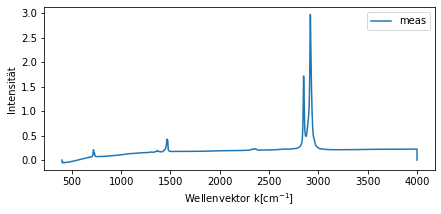

In [6]:
max_0deg_stre = np.max(std_ex_0degree_stretched[:,1])

plt.figure(figsize = [7,3])
plt.plot(std_ex_0degree_stretched[:,0],(std_ex_0degree_stretched[:,1]),label="meas")

plt.ylabel("Intensität")
plt.legend(loc = 0)
#plt.xlim(3980,4010)
plt.xlabel(r"Wellenvektor k$[\mathrm{cm}^{-1}]$")
plt.show()

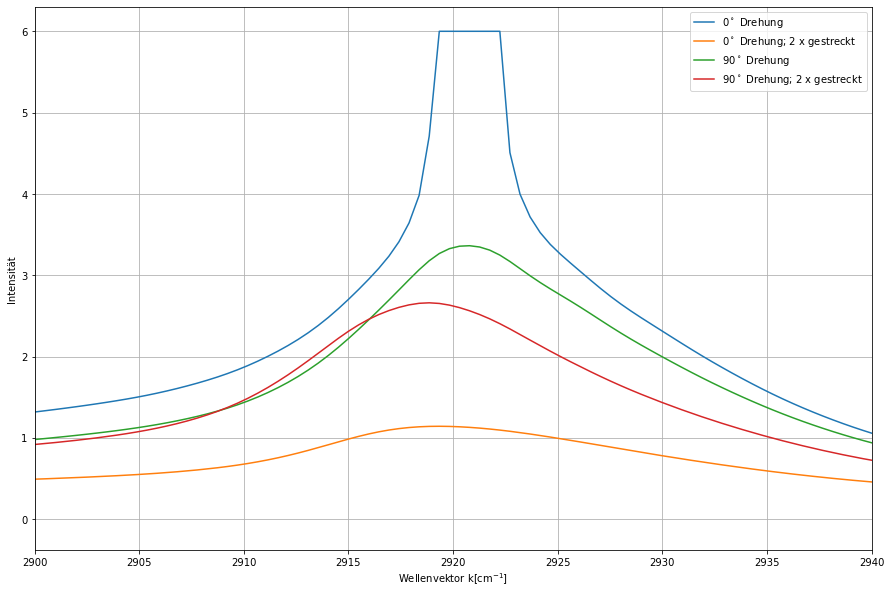

In [32]:
max_std = np.max(std_ex_0degree_stretched[:,1])

plt.figure(figsize = [15,10])
plt.plot(std_ex_90degree[:,0],(std_ex_90degree[:,1]) ,label= r"0$^\circ$ Drehung")

plt.plot(std2_0degree_stretched2x[:,0],(std2_0degree_stretched2x[:,1]) ,label=r"0$^\circ$ Drehung; 2 x gestreckt")

plt.plot(std_ext_0deg[:,0],(std_ext_0deg[:,1]) ,label=r"90$^\circ$ Drehung")

plt.plot(stdd2_90degree_2xstretched[:,0],(stdd2_90degree_2xstretched[:,1]) ,label=r"90$^\circ$ Drehung; 2 x gestreckt")
plt.xlim((2900,2940))
plt.grid(True)

plt.ylabel("Intensität")
plt.legend(loc = 0)
#plt.xlim(3980,4010)
plt.xlabel(r"Wellenvektor k$[\mathrm{cm}^{-1}]$")
plt.show()

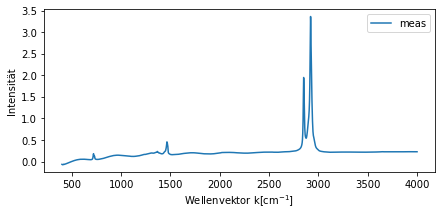

In [8]:
max_0deg_stre = np.max(std_ext_0deg[:,1])

plt.figure(figsize = [7,3])
plt.plot(std_ext_0deg[:,0],(std_ext_0deg[:,1]) ,label="meas")

plt.ylabel("Intensität")
plt.legend(loc = 0)
#plt.xlim(3980,4010)
plt.xlabel(r"Wellenvektor k$[\mathrm{cm}^{-1}]$")
plt.show()

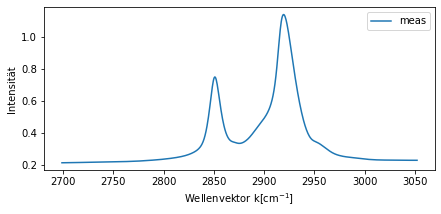

In [9]:
max_0deg_stre = np.max(std2_0degree_stretched2x[:,1])

plt.figure(figsize = [7,3])
plt.plot(std2_0degree_stretched2x[:,0],(std2_0degree_stretched2x[:,1]) ,label="meas")

plt.ylabel("Intensität")
plt.legend(loc = 0)
#plt.xlim(3980,4010)
plt.xlabel(r"Wellenvektor k$[\mathrm{cm}^{-1}]$")
plt.show()

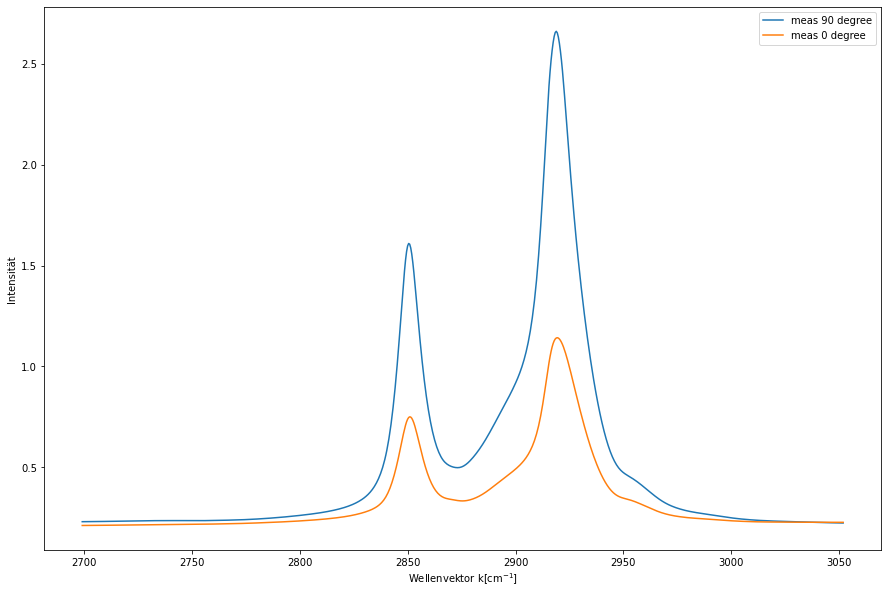

In [15]:
max_0deg_stre = np.max(stdd2_90degree_2xstretched[:,1])

plt.figure(figsize = [15,10])

plt.ylabel("Intensität")
plt.legend(loc = 0)
#plt.xlim(3980,4010)
plt.xlabel(r"Wellenvektor k$[\mathrm{cm}^{-1}]$")
plt.show()